# Asset allocation

In [1]:
import yfinance as yf
import pandas as pd
import datetime
from datetime import date
import financedatabase as fd
import streamlit as st
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### Title

In [2]:
st.title('Investments')

2023-07-03 11:05:15.114 
  command:

    streamlit run C:\Users\marym\miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [3]:
# st.image('')

In [4]:
st.write('One line')

### Selections and inputs

In [5]:
col1, col2, col3, col4 = st.columns(4)

In [6]:
# amount

In [7]:
with col1:
    initial_amount = st.number_input('Initial amount', 0, 50000)

In [8]:
# Type of management

In [9]:
with col2:
    type_investment = st.selectbox('Type of management', ['Passive', 'Active'])

In [10]:
# Type of risk

In [11]:
with col3:
    if type_investment == 'Active':
        risk_investment = st.selectbox('Type of risk', ['Conservative', 'Moderate', 'Agressive'])
    else:
                risk_investment = st.selectbox('Type of risk', ['All-seasons'])


In [12]:
# Language

In [13]:
with col4:
    st.selectbox('Language', ['English'])

### Years of prediction

In [14]:
years_maintenance = st.slider('Select years of investment', 0, 25)

2023-07-03 11:05:15.298 Session state does not function when running a script without `streamlit run`


---

### Calculate 

In [15]:
# Adquisition

In [16]:
start = "2007-06-30"
today = date.today().strftime("%Y-%m-%d")

In [17]:
etf_sp500 = yf.download('CSSPX.MI', start, today) # CSSPX.MI S&P500
etf_sp500_ticker = yf.Ticker("CSSPX.MI")

[*********************100%***********************]  1 of 1 completed


In [18]:
etf_gold = yf.download('IGLD', start, today) # IGLD gold
etf_gold_ticker = yf.Ticker("IGLD")

[*********************100%***********************]  1 of 1 completed


data['HighLow_pct']= (data['High'] - data['Low']) / data['Close'] * 100
data['Pct_change'] = (data['Close'] - data['Open']) / data['Open'] * 100

data['HighLow_pct']= (data['High'] - data['Low']) / data['Close'] * 100
data['Pct_change'] = (data['Close'] - data['Open']) / data['Open'] * 100

In [19]:
initial_amount = 5000

In [20]:
if initial_amount <= 4999: # only sp500
    invest = initial_amount/etf_sp500['Adj Close'][:-1]
else: # Gold and sp
    invest1 = 0.8*initial_amount/etf_sp500['Adj Close'].iloc[-1]
    invest2 = 0.2*initial_amount/etf_gold['Adj Close'].iloc[-1]

In [21]:
list_instruments = (etf_gold, etf_sp500)

### Prediction

In [22]:
list_etf = []
for i in list_instruments:
    i = i.reset_index()
    print(i)
    list_etf.append(i)

          Date       Open       High        Low      Close  Adj Close  Volume
0   2021-03-04  20.049999  20.049999  19.809999  19.826000  18.030205    4500
1   2021-03-05  19.730000  19.879999  19.709999  19.829000  18.032936   45100
2   2021-03-08  19.650000  19.715000  19.625000  19.625000  17.847410   53700
3   2021-03-09  20.030001  20.030001  19.976000  19.976000  18.166618   10700
4   2021-03-10  20.090000  20.090000  20.090000  20.090000  18.270288       0
..         ...        ...        ...        ...        ...        ...     ...
581 2023-06-26  19.240000  19.240000  19.070000  19.160000  19.160000   27900
582 2023-06-27  19.250000  19.250000  19.020000  19.070000  19.070000   12600
583 2023-06-28  19.040001  19.059999  18.940001  18.990000  18.990000   14800
584 2023-06-29  18.886999  19.849001  18.885000  18.910000  18.910000  126100
585 2023-06-30  19.090000  19.129999  19.000000  19.129999  19.129999   29400

[586 rows x 7 columns]
           Date        Open        High 

In [23]:
list_etf[0].describe()

,Open,High,Low,Close,Adj Close,Volume
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,19.885119,19.953360,19.796619,19.866695,18.778326,17299.829352
std,0.869907,0.871016,0.858722,0.856247,0.693850,41218.528113
min,17.530001,17.809999,17.370001,17.719999,16.978384,0.000000
25%,19.295500,19.362501,19.209249,19.261000,18.345163,2525.000000
50%,19.980000,20.049999,19.889999,19.973001,18.729818,5550.000000
75%,20.361500,20.420000,20.280001,20.365251,19.275402,16400.000000
max,22.840000,22.840000,21.980000,22.308001,20.854160,496500.000000


In [24]:
etf_gold = list_etf[1]



In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have a dataframe named 'df' with columns 'date' and 'price'

# Preprocessing the data
etf_gold['Date'] = pd.to_datetime(etf_gold['Date'])
etf_gold['year'] = etf_gold['Date'].dt.year
etf_gold['month'] = etf_gold['Date'].dt.month
etf_gold['day'] = etf_gold['Date'].dt.day
etf_gold['day_of_week'] = etf_gold['Date'].dt.dayofweek

# Mapping day of week to actual day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
etf_gold['day_of_week'] = etf_gold['day_of_week'].map(lambda x: day_names[x])

In [26]:
etf_gold

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,day_of_week
0,2010-05-19,72.849998,72.849998,72.849998,72.849998,72.849998,0,2010,5,19,Wednesday
1,2010-05-20,72.849998,72.849998,72.849998,72.849998,72.849998,0,2010,5,20,Thursday
2,2010-05-21,72.849998,72.849998,72.849998,72.849998,72.849998,0,2010,5,21,Friday
3,2010-05-24,72.849998,72.849998,72.849998,72.849998,72.849998,0,2010,5,24,Monday
4,2010-05-25,0.000000,72.849998,72.849998,72.849998,72.849998,0,2010,5,25,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
3332,2023-06-26,415.750000,416.279999,414.320007,414.559998,414.559998,2840,2023,6,26,Monday
3333,2023-06-27,413.880005,414.119995,411.910004,414.059998,414.059998,8042,2023,6,27,Tuesday
3334,2023-06-28,416.059998,418.619995,415.290009,418.179993,418.179993,6067,2023,6,28,Wednesday
3335,2023-06-29,418.410004,420.500000,417.850006,420.309998,420.309998,5530,2023,6,29,Thursday


# <font color = red> Include mean of day of the week 

# <font color = red> Predict without weekend and holidays

In [27]:
# Splitting the data into training and testing sets
X = etf_gold[['year', 'month', 'day']]
y = etf_gold['Adj Close']
y = pd.DataFrame(y)

In [28]:
X_train = X[:-50]

In [29]:
X_test = X[-50:]
y_train = y[:-50]
y_test = y[-50:]

In [30]:
X_train = X_train.reset_index()
X_train

,index,year,month,day
0,0,2010,5,19
1,1,2010,5,20
2,2,2010,5,21
3,3,2010,5,24
4,4,2010,5,25
...,...,...,...,...
3282,3282,2023,4,14
3283,3283,2023,4,17
3284,3284,2023,4,18
3285,3285,2023,4,19


In [31]:
y_train

,Adj Close
0,72.849998
1,72.849998
2,72.849998
3,72.849998
4,72.849998
...,...
3282,380.549988
3283,380.549988
3284,380.549988
3285,380.549988


In [32]:
X_test = X_test.reset_index()
X_test

,index,year,month,day
0,3287,2023,4,21
1,3288,2023,4,24
2,3289,2023,4,25
3,3290,2023,4,26
4,3291,2023,4,27
5,3292,2023,4,28
6,3293,2023,5,2
7,3294,2023,5,3
8,3295,2023,5,4
9,3296,2023,5,5


In [33]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)
'''
# Making predictions for the year 2025
# Assuming you want to predict for the first day of each month
predictions = []
for month in range(1, 13):
    predictions.append([2023, month, 1, day_names[0]])  # Assuming Monday as the day of the week for each month

predicted_prices = model.predict(predictions)
'''
# Evaluating the model
mse = mean_squared_error(y_test, model.predict(X_test))
print("Mean Squared Error:", mse)

Mean Squared Error: 462.12624336635264


In [34]:
y_reg = model.predict(X_test)

In [35]:
#y_test = y_test.reset_index()
y_test= y_test[['Adj Close']]
y_test

,Adj Close
3287,380.549988
3288,380.549988
3289,380.549988
3290,380.549988
3291,380.549988
3292,380.549988
3293,387.459991
3294,387.209991
3295,380.549988
3296,380.549988


In [36]:
y_reg

array([[384.01511481],
       [383.29739733],
       [383.59870915],
       [383.90002096],
       [384.20133278],
       [384.50264459],
       [383.74195257],
       [384.04326439],
       [384.3445762 ],
       [384.64588802],
       [383.92817054],
       [384.22948235],
       [384.53079417],
       [384.83210598],
       [385.1334178 ],
       [384.41570032],
       [384.71701214],
       [385.01832395],
       [385.31963577],
       [385.62094758],
       [384.9032301 ],
       [385.20454192],
       [385.50585373],
       [385.80716555],
       [386.10847736],
       [385.39075988],
       [385.6920717 ],
       [385.99338351],
       [387.27075008],
       [387.5720619 ],
       [386.85434442],
       [387.15565623],
       [387.45696805],
       [387.75827986],
       [388.05959168],
       [387.3418742 ],
       [387.64318601],
       [387.94449783],
       [388.24580965],
       [388.54712146],
       [387.82940398],
       [388.1307158 ],
       [388.43202761],
       [388

In [37]:
y_test['Predictions'] = y_reg
y_test

,Adj Close,Predictions
3287,380.549988,384.015115
3288,380.549988,383.297397
3289,380.549988,383.598709
3290,380.549988,383.900021
3291,380.549988,384.201333
3292,380.549988,384.502645
3293,387.459991,383.741953
3294,387.209991,384.043264
3295,380.549988,384.344576
3296,380.549988,384.645888


In [38]:
X_test 

,index,year,month,day
0,3287,2023,4,21
1,3288,2023,4,24
2,3289,2023,4,25
3,3290,2023,4,26
4,3291,2023,4,27
5,3292,2023,4,28
6,3293,2023,5,2
7,3294,2023,5,3
8,3295,2023,5,4
9,3296,2023,5,5


In [39]:
#X_test = X_test.reset_index()

In [40]:
#y_test = y_test.reset_index()

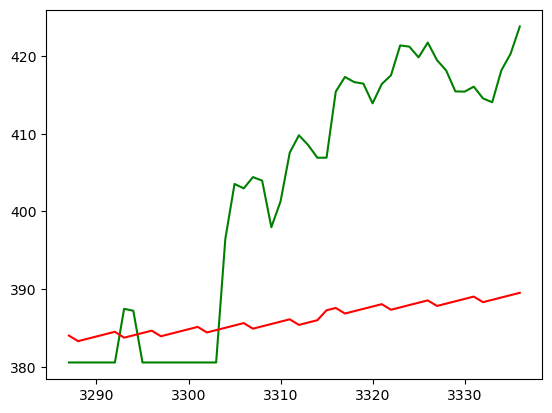

In [41]:
plt.plot(y_test['Adj Close'], label='Actual Price', color='green')
plt.plot(y_test['Predictions'], label='Predicted Price', color='red')

In [42]:
stop

NameError: name 'stop' is not defined

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(etf_gold)

In [ ]:
X_train = etf_gold[:-50]
X_train = X_train[['Date']]
X_train

In [ ]:
y_train = etf_gold[:-50]
y_train = y_train[['Adj Close']]
y_train

In [ ]:
X_test = etf_gold[-50:]
X_test = X_test[['Date']]
X_test

In [ ]:
y_test = etf_gold[-50:]
y_test = y_test[['Adj Close']]
y_test

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.predict(X_test)

### Future days

In [ ]:
stop

### Chart of returns